In [9]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


👉 Upload two images: content image first, then style image


Saving content.jpg to content (7).jpg
Saving style.jpg.jfif to style.jpg.jfif


<ipython-input-17-21e7c1139aba>:60: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-21e7c1139aba>:60: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-17-21e7c1139aba>:60: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


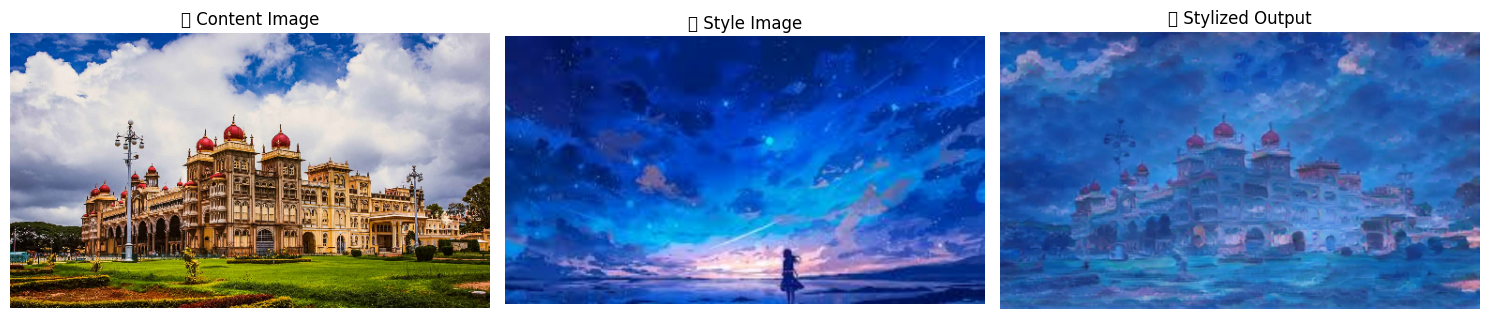

In [17]:
# STEP 1: Install necessary packages
!pip install tensorflow tensorflow_hub matplotlib

# STEP 2: Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# STEP 3: Upload content and style images
print("👉 Upload two images: content image first, then style image")
uploaded = files.upload()

# Get file names
file_names = list(uploaded.keys())
content_path = file_names[0]
style_path = file_names[1]

# STEP 4: Load and preprocess images
def load_image(path, max_dim=512):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    return img[tf.newaxis, :]

content_image = load_image(content_path)
style_image = load_image(style_path)

# STEP 5: Load style transfer model and apply it
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# STEP 6: Display input and output images
def show_img(tensor, title):
    image = tf.squeeze(tensor, axis=0)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(15, 5))

# Show content image
plt.subplot(1, 3, 1)
show_img(content_image, '📷 Content Image')

# Show style image
plt.subplot(1, 3, 2)
show_img(style_image, '🎨 Style Image')

# Show stylized result
plt.subplot(1, 3, 3)
show_img(stylized_image, '✨ Stylized Output')

plt.tight_layout()
plt.show()
